In [17]:
pip install pywavelets

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install mne numpy scipy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
python -u EEGclassify.py --rand_guess 0 --lr1 5e-4 --epoch 100 --layer 1 --pooling mean --dataset imagine_decode --sub "01" --cls 39 --dropout1 0.5 --dropout2 0.5 --feel1 20 --feel2 10 --subset_ratio 1

In [19]:
import pywt
import numpy as np
from pathlib import Path
import pickle

# --- 1. Load the signal (from your previous cell) ---
pkl_path = Path(f"Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
signal = trials[0]['input_features'][0, :] # Using the single channel signal

# --- 2. Define the transform parameters ---
morlet_wavelet = 'morl'
# The CWT function needs a list of scales, not just one number.
# Here, we create 30 scales to analyze frequencies from 1-70Hz.
scales = np.logspace(np.log10(1), np.log10(70), num=30)

# --- 3. Apply the Continuous Wavelet Transform ---
# Now that 'pywt' is imported and all variables are defined, this will work.
coeffs, frequencies = pywt.cwt(signal, scales, morlet_wavelet, sampling_period=1/500)

# --- 4. Verification ---
print("Successfully calculated CWT coefficients.")
print(f"Shape of coefficients matrix: {coeffs.shape}")
print(f"(Number of Scales, Number of Time Points): {coeffs.shape[0]}, {coeffs.shape[1]}")

Successfully calculated CWT coefficients.
Shape of coefficients matrix: (30, 125, 1651)
(Number of Scales, Number of Time Points): 30, 125


In [20]:
coeffs

array([[[-5.52306102e-07, -1.38767817e-06,  1.17138384e-06, ...,
         -2.87332406e-07, -1.66485984e-07, -3.73488053e-07],
        [-6.37287370e-07, -1.18690761e-06,  1.21421375e-06, ...,
         -1.22895284e-07,  1.41980123e-07, -9.22152909e-07],
        [-4.27415558e-07, -6.60425022e-07,  7.96775960e-07, ...,
         -5.82072652e-09,  2.83798972e-07, -1.08747804e-06],
        ...,
        [ 1.88172877e-01, -1.70251128e+00, -4.77006786e-01, ...,
          1.57991313e-01,  2.06242450e-02, -1.11285953e+00],
        [ 1.98921100e-01, -3.65022903e-01, -2.14235453e-01, ...,
          4.56409517e-01, -1.09470437e-02, -1.08242518e-01],
        [-3.04901149e-01, -8.03813356e+03, -2.95336948e+02, ...,
          1.19478243e+02, -2.94727146e+02, -8.03752376e+03]],

       [[ 8.05626099e-07, -8.91337104e-07, -1.96841627e-06, ...,
         -4.49758692e-07,  4.06744374e-07, -5.14136409e-07],
        [ 4.75801168e-07, -8.00317229e-07, -1.98048280e-06, ...,
         -6.49305864e-07,  7.30169133e

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [8]:
def get_fft_values(y_values, T, N, f_s):
    fft_vals = np.fft.fft(y_values)
    fft_vals = np.abs(fft_vals)[:N // 2] * (2 / N)
    freqs = np.fft.fftfreq(N, T)[:N // 2]
    return freqs, fft_vals


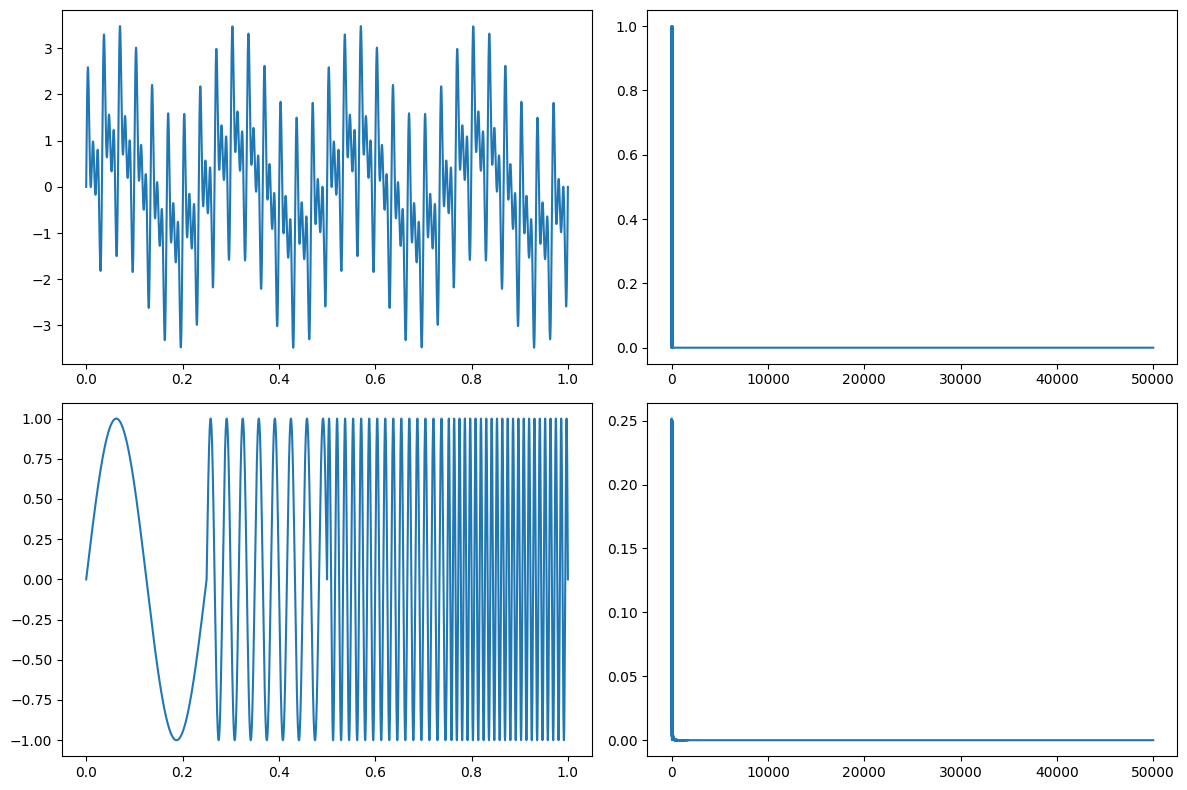

In [10]:
t_n = 1
N = 100000
T = t_n / N
f_s = 1/T

xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=int(N/4))

frequencies = [4, 30, 60, 90]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

composite_signal1 = y1a + y2a + y3a + y4a
composite_signal2 = np.concatenate([y1b, y2b, y3b, y4b])

f_values1, fft_values1 = get_fft_values(composite_signal1, T, N, f_s)
f_values2, fft_values2 = get_fft_values(composite_signal2, T, N, f_s)

fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axarr[0,0].plot(xa, composite_signal1)
axarr[1,0].plot(xa, composite_signal2)
axarr[0,1].plot(f_values1, fft_values1)
axarr[1,1].plot(f_values2, fft_values2)
(...)
plt.tight_layout()
plt.show()

In [5]:
import pywt
import matplotlib.pyplot as plt
print(pywt.families(short=False))
['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 
'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 
'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/masuma/Desktop/Bisal_2314096/Chisco/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


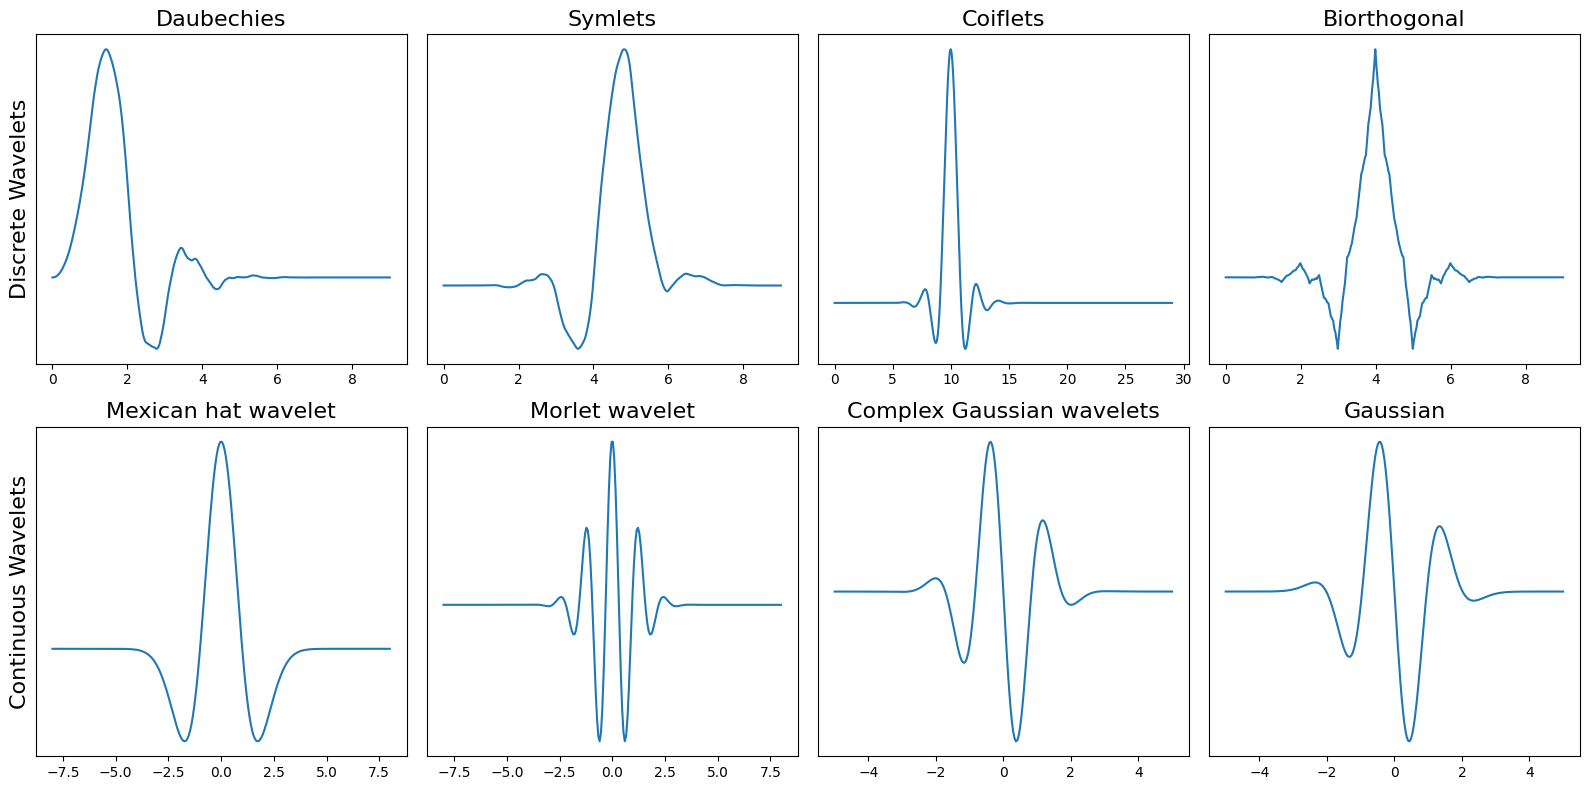

In [8]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

['db1', 'db2', 'db3', 'db4', 'db5']


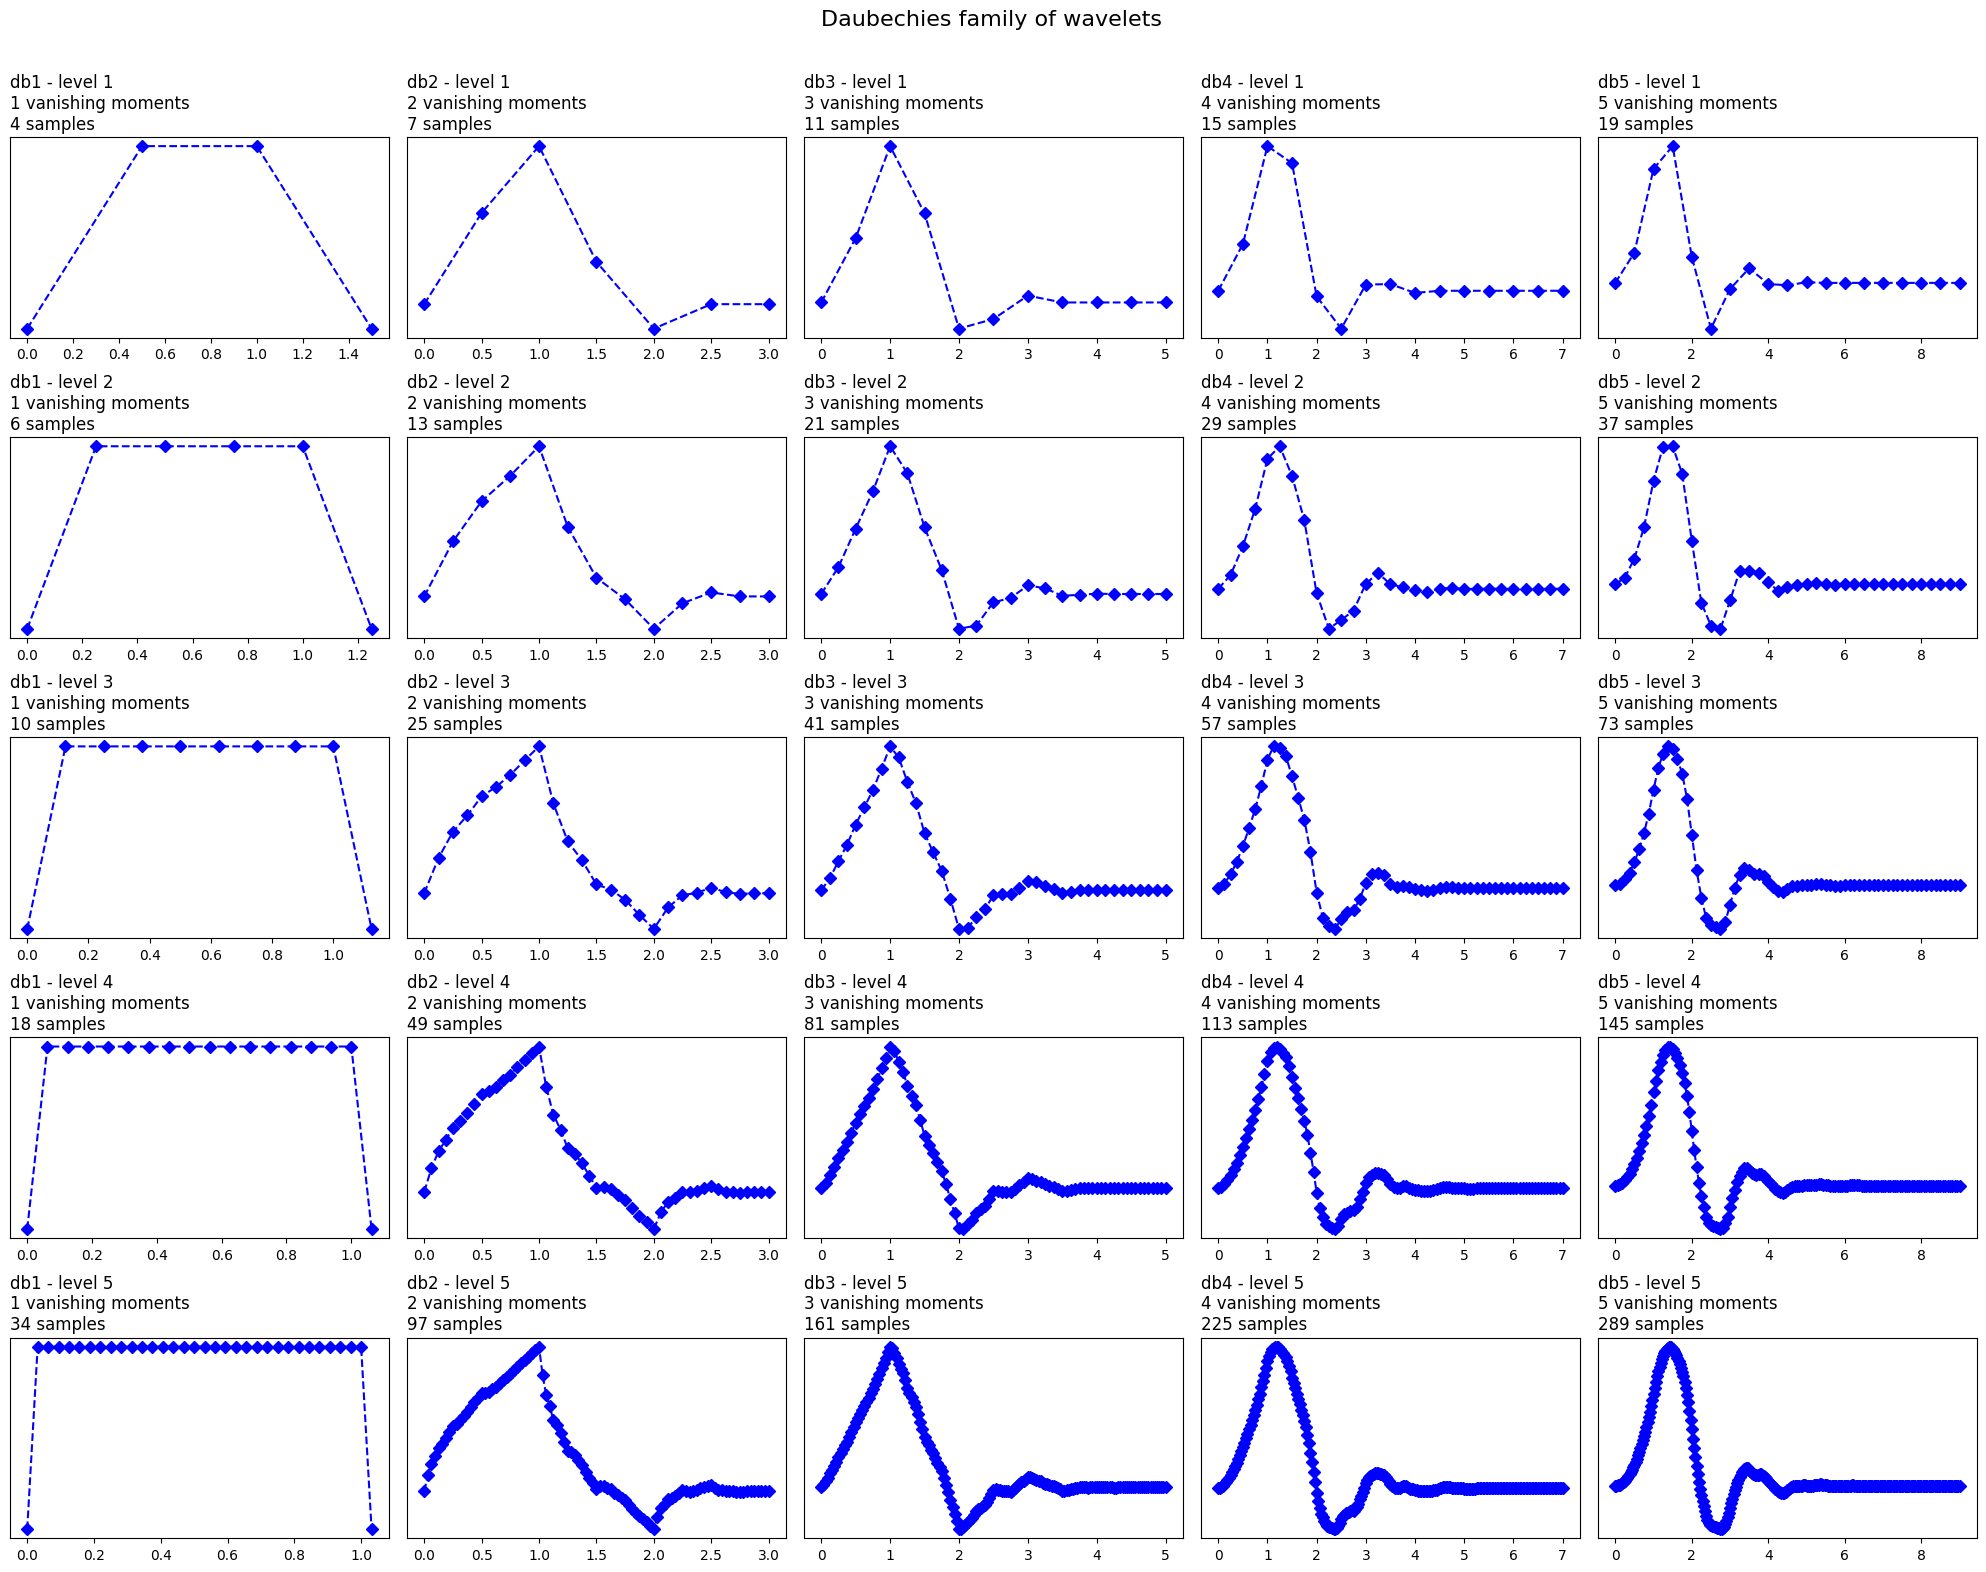

In [4]:
import pywt
import matplotlib.pyplot as plt

db_wavelets = pywt.wavelist('db')[:5]
print(db_wavelets)
# *** ['db1', 'db2', 'db3', 'db4', 'db5']

fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [15]:
import torch
import torch.nn as nn
import pywt
import numpy as np
# To enable parallel processing, you need to install joblib:
# pip install joblib
from joblib import Parallel, delayed

# This is the worker function that will be executed in parallel.
# It's defined outside the class to be easily "pickled" by joblib.
def _transform_one_signal(signal, scales, wavelet_name):
    """Applies CWT to a single time-series signal."""
    # 1. Apply CWT. Output `coeffs` has shape (n_scales, n_samples).
    coeffs, _ = pywt.cwt(signal, scales, wavelet_name)
    
    # 2. Take the magnitude of the complex coefficients.
    magnitude_coeffs = np.abs(coeffs)
    
    # 3. Average the magnitudes across the frequency (scales) dimension.
    # This creates a new signal representing time-varying power. Shape: (n_samples,)
    return np.mean(magnitude_coeffs, axis=0)


class WaveletTransform(nn.Module):
    """
    A non-trainable module that applies a Continuous Wavelet Transform (CWT)
    to the input EEG signal as a fixed feature extraction layer.

    This version is optimized for speed using parallel processing across CPU cores.
    """
    def __init__(self, sfreq=500, wavelet_name='morl', trainable=False, n_jobs=-1):
        """
        Initializes the wavelet transform layer.
        Args:
            sfreq (int): The sampling frequency of the EEG signal (Chisco is 500 Hz).
            wavelet_name (str): The name of the mother wavelet to use (e.g., 'morl' for Morlet).
            trainable (bool): If False, the layer's parameters are not updated during training.
            n_jobs (int): The number of CPU cores to use for parallel processing. -1 means use all available cores.
        """
        super().__init__()
        self.sfreq = sfreq
        self.wavelet_name = wavelet_name
        self.n_jobs = n_jobs
        
        # Define scales corresponding to common EEG frequency bands.
        # We will analyze frequencies from 1 Hz (Delta) to 70 Hz (Low Gamma).
        self.freqs = np.logspace(np.log10(1), np.log10(70), num=30)
        self.scales = self._freq_to_scale(self.freqs, self.wavelet_name, self.sfreq)
        
        # This layer is a fixed transformation, not meant to be trained.
        if not trainable:
            for param in self.parameters():
                param.requires_grad = False

    def _freq_to_scale(self, freqs, wavelet_name, sfreq):
        """Helper function to convert an array of frequencies to wavelet scales."""
        central_freq = pywt.central_frequency(wavelet_name)
        return central_freq * sfreq / freqs

    def forward(self, x):
        """
        Applies the CWT to the input tensor in parallel.
        Args:
            x (torch.Tensor): Input tensor of shape (N, Chans, Samples).
        Returns:
            torch.Tensor: Transformed tensor of the same shape (N, Chans, Samples).
        """
        device = x.device
        batch_size, n_channels, n_samples = x.shape
        
        x_cpu = x.detach().cpu().numpy()
        
        # --- OPTIMIZATION ---
        # Instead of nested Python loops, we flatten the batch and channels
        # to create a list of independent signals to be processed in parallel.
        # Shape changes from (N, C, S) to (N * C, S).
        signals_to_process = x_cpu.reshape(-1, n_samples)
        
        # Use joblib to run the CWT on all signals across multiple CPU cores.
        # `n_jobs=-1` uses all available cores.
        processed_signals = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one_signal)(signal, self.scales, self.wavelet_name) for signal in signals_to_process
        )
        
        # The result is a list of 1D arrays. We stack them and reshape back.
        # Stack to (N * C, S), then reshape to (N, C, S).
        output_numpy = np.stack(processed_signals).reshape(batch_size, n_channels, n_samples)
        
        # Convert back to a tensor on the original device.
        output_tensor = torch.from_numpy(output_numpy).float().to(device)
        
        assert output_tensor.shape == x.shape, "Output shape must match input shape"
        
        return output_tensor